<a href="https://colab.research.google.com/github/Prabhu-shukla/Prabhu-shukla/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# We will develop a decision tree model for a classification problem


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.tree import plot_tree

In [2]:
air_data=pd.read_csv("airlines_data.csv")
air_data.head(25)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


In [4]:
air_data.dtypes

,0
satisfaction,object
Customer Type,object
Age,int64
Type of Travel,object
Class,object
Flight Distance,int64
Seat comfort,int64
Departure/Arrival time convenient,int64
Food and drink,int64
Gate location,int64


In [5]:
air_data.shape

(129880, 22)

In [ ]:
# from the data tupes we cn see that there are few categorical prameters, One of them is class which is ordinal means
# it has an inherent order.

In [ ]:
# now we will check the unique items in this ordinal data

In [6]:
air_data['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [ ]:
# these classes can be very useful in determining the predictor variable in
# question which is "satisfaction"

In [7]:
# now we will see the satisfaction column deeply

In [8]:
air_data["satisfaction"].value_counts(dropna=False)

,count
satisfaction,
satisfied,71087
dissatisfied,58793


In [9]:
total = air_data["satisfaction"].value_counts()["satisfied"] + air_data["satisfaction"].value_counts()["dissatisfied"]
print(total)
air_data.shape[0]
# we did all this to cross check and do some coding for fun
# nothing else


129880


129880

In [10]:
satisfied_customers_percentage = (air_data["satisfaction"].value_counts()["satisfied"] / air_data.shape[0]) * 100
print(f"Percentage of satisfied customers: {satisfied_customers_percentage:.2f}%")

Percentage of satisfied customers: 54.73%


In [ ]:
# this number 54.73 is our yardstick to measure the efficacy of model

In [ ]:
# Because sklearn decision tree does not support missing values and if there is
# a small number of NaN then we can safely remove it


In [11]:
air_data.isnull().sum()

,0
satisfaction,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0
Food and drink,0
Gate location,0


In [12]:
# as this is a very small number so we will remove it before model development

In [13]:
air_data_subset = air_data.dropna(axis=0).reset_index(drop = True)
air_data_subset.isnull().sum()

,0
satisfaction,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0
Food and drink,0
Gate location,0


In [14]:
print(air_data_subset.shape)
air_data_subset.head()

(129487, 22)


,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [15]:
air_data.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [16]:
# we can see that th rows having missing data are removed

In [ ]:
# now we will convert the catgorical data into numeric one
# for this we can use map,replace func or do ONE-HOT coding

In [17]:
air_data_subset["Class"]= air_data["Class"].map({"Business":0,"Eco Plus":1,"Eco":2})
air_data_subset["satisfaction"]= air_data["satisfaction"].map({"dissatisfied":0,"satisfied":1})
air_data_subset['Customer Type']= air_data['Customer Type'].map({'Loyal Customer':0,'disloyal Customer':1})
air_data_subset['Type of Travel']= air_data['Type of Travel'].map({'Business travel':0,'Personal Travel':1})
air_data_subset.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,65,1,2,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1,0,47,1,0,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1,0,15,1,2,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1,0,60,1,2,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1,0,70,1,2,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [18]:
air_data_subset.dtypes

,0
satisfaction,int64
Customer Type,int64
Age,int64
Type of Travel,int64
Class,int64
Flight Distance,int64
Seat comfort,int64
Departure/Arrival time convenient,int64
Food and drink,int64
Gate location,int64


From the above dtypes we can see that all the data is now numerical and ready for modelng

Our variable (Y) is "satisfaction" and the rest are the predictors (X)


In [19]:
Y = air_data_subset["satisfaction"]
X = air_data_subset.drop(["satisfaction"],axis=1)

We will split the data in training (75%) and tet (25%) sets

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

From this point we are entering the decision tree coding .


In [21]:
decision_tree =  tree.DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

In [22]:
dt_pred = decision_tree.predict(X_test)


In [ ]:
print("Decision Tree")
print("accuracy" , accuracy_score(Y_test,dt_pred))
print("precision" , precision_score(Y_test,dt_pred))
print("recall" , recall_score(Y_test,dt_pred))
print("f1" , f1_score(Y_test,dt_pred))

Decision Tree
accuracy 0.7551896700852588
precision 0.7775714607247355
recall 0.7767410488449216
f1 0.7771560329555999


Now we will generate the Confusion matrix to see the predictions

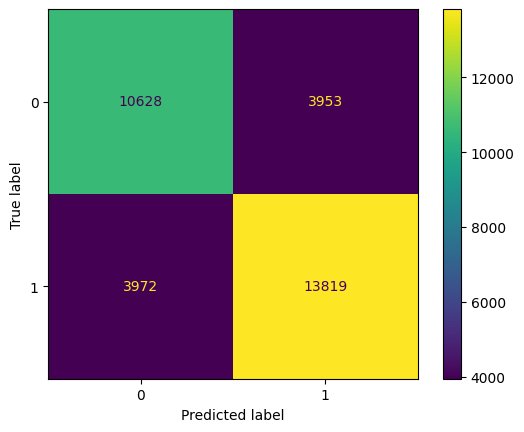

In [23]:
cm = confusion_matrix(Y_test,dt_pred, labels = decision_tree.classes_ )

cm_disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = decision_tree.classes_)

cm_disp.plot()

In the matrix it is clear that the model has predicted pretty well .The number of TRUE +ves and TRUE -ves is quite high than the FALSE +ves and FALSE -ves


Now we will see the split

In [24]:
#plt.figure(figsize=(12,8))
#tree.plot_tree(decision_tree,filled=True)


[Text(0.5, 0.875, 'Inflight entertainment <= 3.5\ngini = 0.496\nsamples = 97115\nvalue = [44043, 53072]\nclass = satisfied'),
 Text(0.25, 0.625, 'Customer Type <= 0.5\ngini = 0.454\nsamples = 43502\nvalue = [28353.0, 15149.0]\nclass = dissatisfied'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Ease of Online booking <= 3.5\ngini = 0.496\nsamples = 31229\nvalue = [17054, 14175]\nclass = dissatisfied'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Seat comfort <= 0.5\ngini = 0.146\nsamples = 12273\nvalue = [11299, 974]\nclass = dissatisfied'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Class <= 0.5\ngini = 0.414\nsamples = 53613\nvalue = [15690.0, 37923.0]\nclass = satisfied'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Ease of Online booking <= 3.5\ngini = 0.238\nsamples = 29988\nvalue = [4141, 25847]\nclass = satisfied'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 T

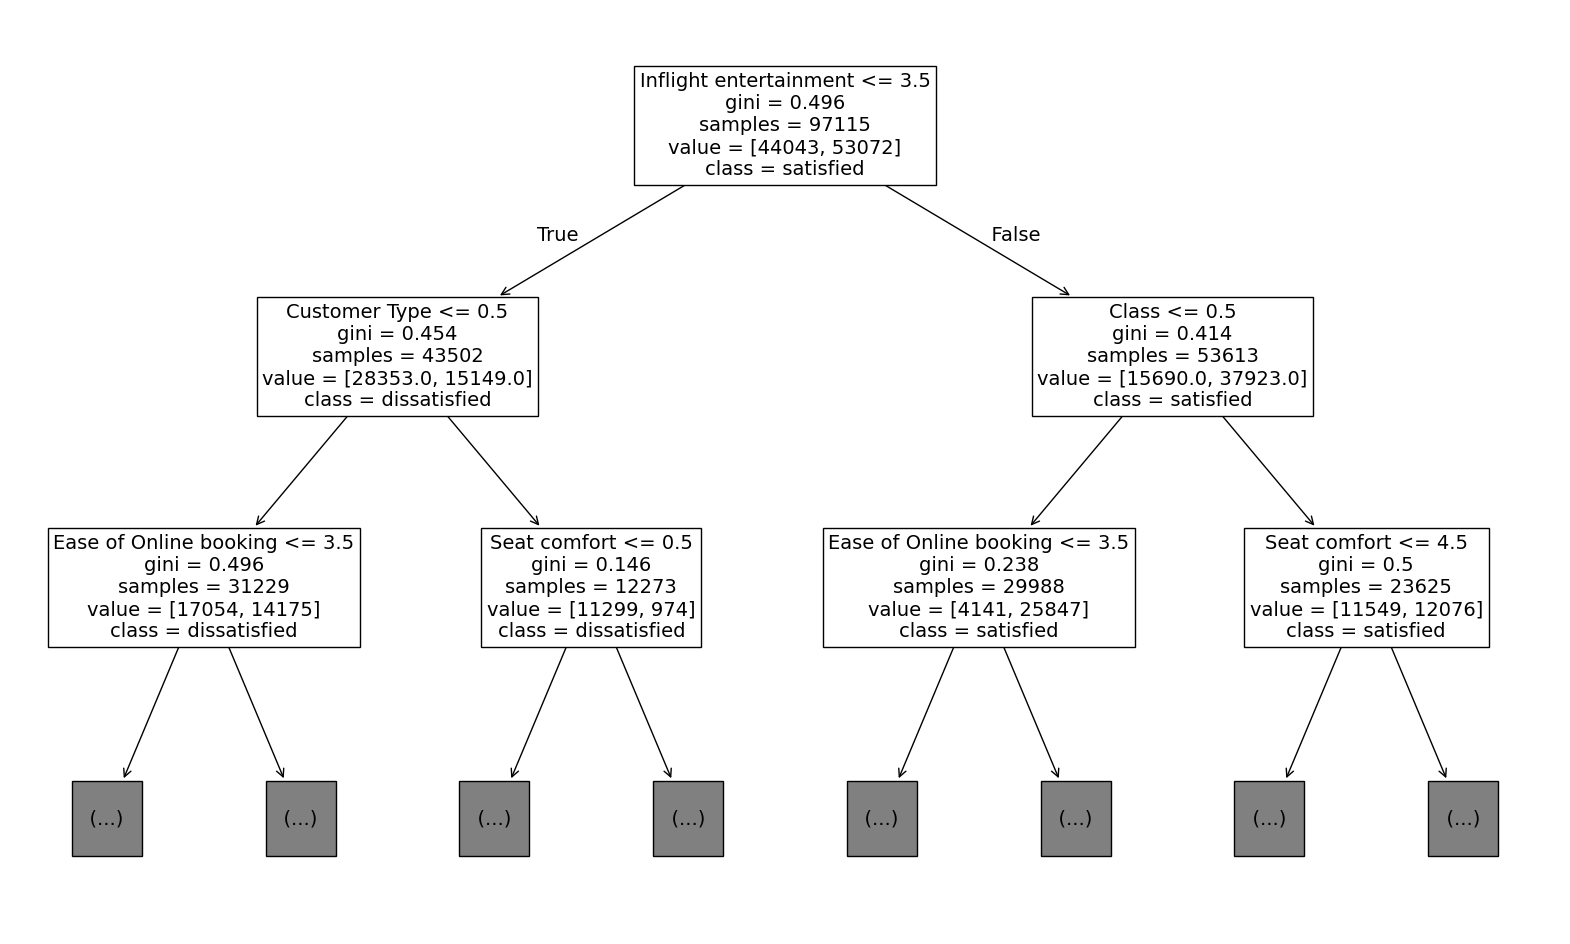

In [25]:
plt.figure(figsize=(20, 12))
plot_tree(decision_tree, max_depth = 2, fontsize =14,  feature_names= X.columns, class_names = ["dissatisfied","satisfied"])
